# 量子テレポーテーション


In [1]:
# Qiskitライブラリーを導入
from qiskit import *

# 描画のためのライブラリーを導入
import matplotlib.pyplot as plt
%matplotlib inline

# 数値計算モジュールを導入
import numpy as np

In [2]:
# Qiskitバージョンの確認
qiskit.__qiskit_version__

{'qiskit-terra': '0.13.0',
 'qiskit-aer': '0.5.1',
 'qiskit-ignis': '0.3.0',
 'qiskit-ibmq-provider': '0.7.0',
 'qiskit-aqua': None,
 'qiskit': '0.19.1'}

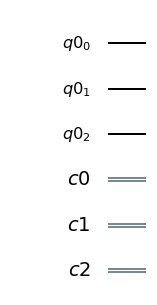

In [3]:
# 3量子ビット回路を用意
qr = QuantumRegister(3)    
a_0 = ClassicalRegister(1)
a_1 = ClassicalRegister(1)
b_0 = ClassicalRegister(1)

qc = QuantumCircuit(qr,a_0,a_1,b_0)    

# 回路を描画
qc.draw(output="mpl")

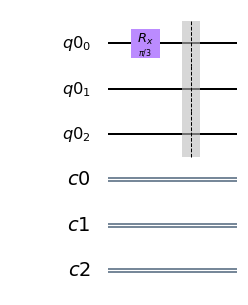

In [4]:
# Aliceのもつ未知の量子状態ψを今回はRxで作ります
qc.rx(np.pi/3,0)
qc.barrier()    #回路を見やすくするために入れます

# 回路を描画
qc.draw(output="mpl")

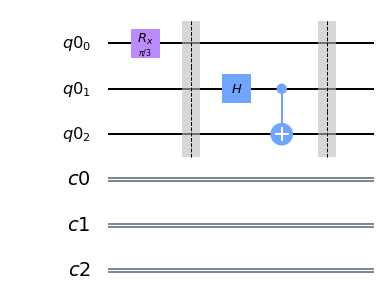

In [5]:
# EveがEPRペアを作ってq1をAliceにq2をBobに渡します
qc.h(1)
qc.cx(1, 2)
qc.barrier()    #回路を見やすくするために入れます

# 回路を描画
qc.draw(output="mpl")

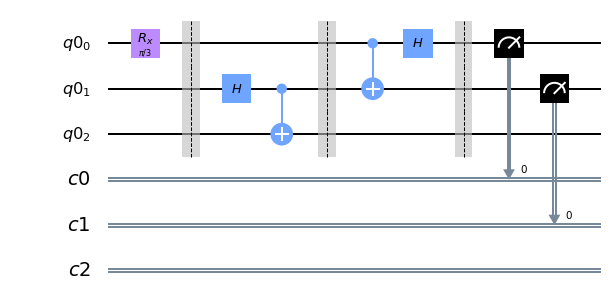

In [6]:
# AliceがCNOTとHでψと自分のEPRペアをエンタングルさせ測定します。
qc.cx(0, 1)
qc.h(0)
qc.barrier()
qc.measure(0, a_0)
qc.measure(1, a_1)

# 回路を描画
qc.draw(output="mpl")

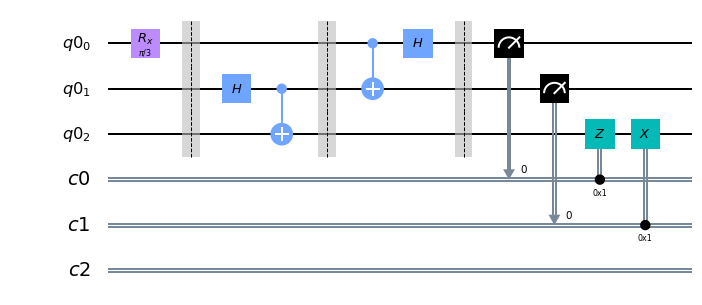

In [7]:
#Aliceが測定結果をBobに送り、Bobが結果に合わせて操作します
qc.z(2).c_if(a_0, 1)
qc.x(2).c_if(a_1, 1)

qc.draw(output="mpl")

量子テレポーテーション回路が完成しました。

## 演習2
(1) 量子テレポーテーション回路を自分で組んで表示してみましょう。<br>
今回は、未知の量子状態をY回転ゲート(ryを使います。角度は自由に決めます。)で作ってみましょう。<br>

(2) Bobに未知の量子状態が転送されたことを確認するために、最後にBobの量子ビットに逆向きのY回転を適用して、QASMシミュレーターで実験し、測定結果が0になることを確認しましょう。